In [13]:
from benchmarks.plots import plotting_script as plotter
from benchmarks.load_bench_script import load_func
from benchmarks import integrate_greens as greens
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.integrate as integrate

In [14]:
c = 29.998
A = c/3

In [15]:
def bench(x, t):
    t = t / c
    xi = x / math.sqrt(A * t)
    return (1/ math.sqrt(A * t)) * 0.5 * (1/math.sqrt(math.pi)) * np.exp(-xi**2/4)
def bench2(x, t):
    t = t / c
    xi = x / math.sqrt(A * t)
    return 0.5 * (1/math.sqrt(math.pi)) * np.exp(-xi**2/4)

In [16]:
def rmse(l1, l2):
    return np.sqrt(np.mean((l1-l2)**2))
#     return np.mean(l1-l2)

In [17]:
def results_maker(t):
    tau = t/ c
    dimensionalize = 1/math.sqrt(A * tau)
    if math.exp(-t)/2/t <= 1e-14:
        dx_mode = True
    else:
        dx_mode = False
        
    res = greens.plane_IC(t,2000)
    if t < 500000:
        xs = np.linspace(0, t + 1e-10, 100)
    else:
        xs = np.linspace(0, 90 + 1e-10, 100)
    phi = load_func('plane_IC', t, xs)[0]
    
    phi_asmyp = xs*0
    for ix in range(xs.size):
        phi_asmyp[ix] = integrate.quad(collided_asymp, 0, math.pi, args = (xs[ix], t, 1.0))[0] + np.exp(-t)/2/t*np.heaviside(1-xs[ix]/t,0)
    
    
    return rmse(phi/ dimensionalize, bench2(xs, t)), rmse(phi, bench(xs, t)), rmse(phi_asmyp, phi), rmse(phi_asmyp, bench(xs, t))

    

In [18]:
def cot(x):
    return 1/ np.tan(x)
def csc(x):
    return 1 / np.sin(x)

In [19]:
def collided_asymp(u, x, t, c):
    return   (c*np.exp(t*(-1 + (c*u*cot(u/2.))/2.))*u**2*np.cos((c*x*(-2*cot(u/2.) + u*cot(u/2.)**2))/2.)*csc(u/2.)**2)/(8.*math.pi) * np.heaviside(1-x/t,0)

t =  25


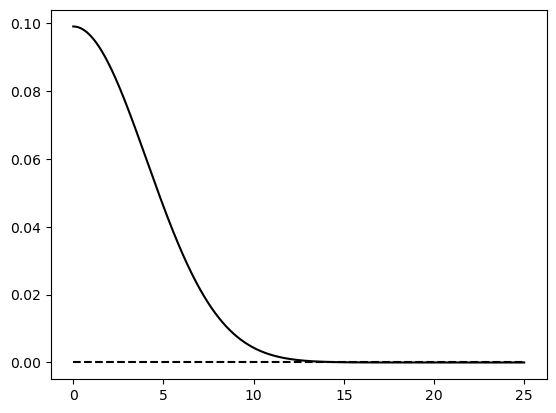

In [20]:
res = greens.plane_IC(25,1000)

t =  1.0


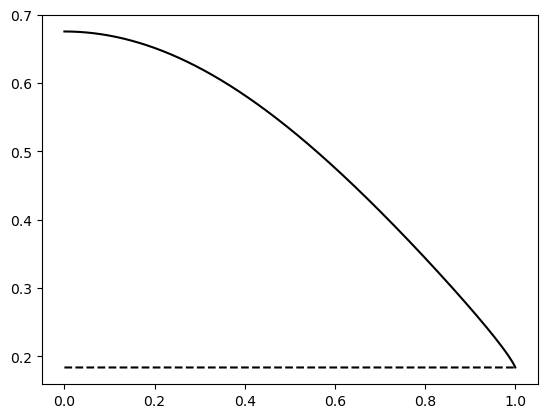

KeyError: "Unable to open object (object 't = 1.0x0=0.5' doesn't exist)"

In [21]:
tlist = np.linspace(1, 8, 2)
rmselist = []
rmselist2 = []
rmselist3 = []
rmselist4 = []
for t in tlist:
    rmselist.append(results_maker(t)[0])
    rmselist2.append(results_maker(t)[1])
    rmselist3.append(results_maker(t)[2])
    rmselist4.append(results_maker(t)[3])
    


ValueError: x and y must have same first dimension, but have shapes (2,) and (0,)

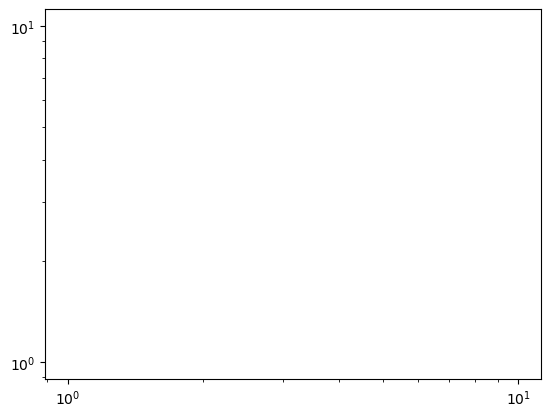

In [22]:
plt.figure(1)
plt.loglog(tlist, rmselist, '-o', mfc = 'none')
plt.loglog(tlist, rmselist2, '-s', mfc = 'none')
plt.loglog(tlist, 0.12*np.array(tlist)**(-math.sqrt(3)), '--', label = r'$-\sqrt{3}$')
plt.loglog(tlist, 0.12*np.array(tlist)**(-math.sqrt(2)/2), '--', label = r'$-\sqrt{2}/2$')
plt.loglog(tlist, 0.08*np.array(tlist)**(-1), '--', label = r'$-1$')
plt.loglog(tlist, 0.1*np.array(tlist)**(-2**0.5), '--', label = r'$-\sqrt{2}$')
plt.legend()
plt.show()

In [ ]:
plt.figure(2)
plt.loglog(tlist, rmselist3, '-^', mfc = 'none')
plt.loglog(tlist, rmselist4, '-x', mfc = 'none')
plt.loglog(tlist, 0.17*np.array(tlist)**(-math.sqrt(2)/2), '--', label = r'$-\sqrt{2}/2$')
plt.legend()
plt.show()

In [ ]:
t = 10
tau = t/c
dimensionalize = 1/math.sqrt(A * tau)
xs = np.linspace(0, t, 10000)
phi = load_func('plane_IC', t, xs)[0]
# plt.plot(xs, phi/dimensionalize, '-o', mfc = 'none')
plt.plot(xs, phi, '-o', mfc = 'none')
# plt.plot(xs, bench2(xs,t), '--')
plt.plot(xs, bench(xs,t), '--')

In [23]:
res = greens.plane_IC(2.5,2000)

t =  2.5


OSError: Unable to open file (file is already open for read-only)

In [24]:


t = 1
# res = greens.plane_IC(t,2000)
xs = np.linspace(0, t + 1e-12, 1000)
phi = load_func('plane_IC', t, xs)[0]
# plt.plot(xs, phi/dimensionalize, '-o', mfc = 'none')
plt.plot(xs, phi, '-',color = 'tab:blue', mfc = 'none', label = f't={t}')
plt.plot(-xs, phi, '-', color = 'tab:blue',mfc = 'none')

t = 2.5

xs = np.linspace(0, t + 1e-12, 1000)
phi = load_func('plane_IC', t, xs)[0]
# plt.plot(xs, phi/dimensionalize, '-o', mfc = 'none')
plt.plot(xs, phi, '-',color = 'tab:red', mfc = 'none', label = f't={t}')
plt.plot(-xs, phi, '-',color = 'tab:red', mfc = 'none')

t = 5
# res = greens.plane_IC(t,2000)
xs = np.linspace(0, t + 1e-12, 1000)
phi = load_func('plane_IC', t, xs)[0]
# plt.plot(xs, phi/dimensionalize, '-o', mfc = 'none')
plt.plot(xs, phi, '-',color = 'tab:green', mfc = 'none', label = f't={t}')
plt.plot(-xs, phi, '-',color = 'tab:green', mfc = 'none')


plt.legend()
plt.xlabel('x (cm)', fontsize = 16)
plt.ylabel(r'$\phi$', fontsize = 16)

# plt.plot(xs, bench2(xs,t), '--')
plt.savefig('transportdemo.pdf')



KeyError: "Unable to open object (object 't = 1x0=0.5' doesn't exist)"

In [ ]:

t = 1
# res = greens.plane_IC(t,2000)
xs = np.linspace(0, t + 1e-12, 1000)
phi = load_func('plane_IC', t, xs)[1]
# plt.plot(xs, phi/dimensionalize, '-o', mfc = 'none')
plt.plot(xs, phi, '-',color = 'tab:blue', mfc = 'none', label = f't={t}')
plt.plot(-xs, phi, '-', color = 'tab:blue',mfc = 'none')

t = 2.5

xs = np.linspace(0, t + 1e-12, 1000)
phi = load_func('plane_IC', t, xs)[1]
# plt.plot(xs, phi/dimensionalize, '-o', mfc = 'none')
plt.plot(xs, phi, '-',color = 'tab:red', mfc = 'none', label = f't={t}')
plt.plot(-xs, phi, '-',color = 'tab:red', mfc = 'none')

t = 5
# res = greens.plane_IC(t,2000)
xs = np.linspace(0, t + 1e-12, 1000)
phi = load_func('plane_IC', t, xs)[1]
# plt.plot(xs, phi/dimensionalize, '-o', mfc = 'none')
plt.plot(xs, phi, '-',color = 'tab:green', mfc = 'none', label = f't={t}')
plt.plot(-xs, phi, '-',color = 'tab:green', mfc = 'none')


plt.legend()
plt.xlabel('x (cm)', fontsize = 16)
plt.ylabel(r'$\phi$', fontsize = 16)

# plt.plot(xs, bench2(xs,t), '--')
plt.savefig('transportdemouncol.pdf')



In [ ]:
tt = 500

xs = np.linspace(0, 100, 500)
res = greens.plane_IC(tt,1000)
t = 50
phi_asymp = xs*0
for ix in range(xs.size):
        phi_asymp[ix] = integrate.quad(collided_asymp, 0, math.pi, args = (xs[ix], tt, 1.0))[0] + np.exp(-t)/2/t*np.heaviside(1-xs[ix]/t,0)

In [ ]:
plt.plot(xs, bench(xs, tt),'bo', mfc = 'none', label = 'diffusion', )
plt.plot(xs, phi_asymp, label = 'asymptotic')
phi = load_func('plane_IC', tt, xs)[0]
plt.plot(xs, phi, '-k', label = 'full')
plt.legend()
plt.xlabel('z')
plt.ylabel(r'$\phi$')
plt.title(r'$\tau=$' + f'{tt}')
plt.savefig('analytic_test_1.pdf')

In [ ]:
def x0plot():
    x0s = np.linspace(0.1, 10, 50)
    t=10
    dt = 0.1
    for ix0, x0 in enumerate(x0s):
        xs = np.linspace(0, x0 + t)
        phi = load_func('square_IC', t, xs, x0)[0]
        plt.plot(xs, phi, '-k')
        plt.plot(-xs, phi, '-k')
        plt.title(f'x0={x0}')
        plt.ylabel(r'$\phi$')
        plt.xlabel('x (cm)')
        plt.pause(dt)
        plt.savefig(x0_animation/f"square_IC_{ix0}.jpg")
        plt.clf()
        

In [ ]:
x0plot()